In [2]:
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install tensorflow
%pip install regressionmetrics


[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached regressionmetrics-1.4.0-py3-none-any.whl (9.0 kB)
ERROR: Could not find a version that satisfies the requirement tensorflow-cpu (from regressionmetrics) (from versions: none)
ERROR: No matching distribution found for tens

In [3]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from datetime import datetime

mpl.rcParams['figure.figsize'] = (12, 10)
mpl.rcParams['axes.grid'] = False

In [4]:
dateParser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
dataset = pd.read_csv("./datasets/final/final-formed-auvergrid.csv", delimiter=',', date_parser=dateParser, parse_dates=['Timestamp'])

date_time = pd.to_datetime(dataset['Timestamp'], format='%Y-%m-%d %H:%M:%S')

dataset.drop('Timestamp', axis=1, inplace=True)

/var/folders/rz/x38ry1m901jcjct47ydtrgph0000gn/T/ipykernel_68089/2949742091.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = pd.read_csv("./datasets/final/final-formed-auvergrid.csv", delimiter=',', date_parser=dateParser, parse_dates=['Timestamp'])


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CPUTime        8760 non-null   int64  
 1   Memory         8760 non-null   int64  
 2   NJobs          8760 non-null   int64  
 3   NProcs         8760 non-null   int64  
 4   ArrivedJobs    8760 non-null   int64  
 5   CompletedJobs  8760 non-null   int64  
 6   cosHour        8760 non-null   float64
 7   sinHour        8760 non-null   float64
 8   cosDay         8760 non-null   float64
 9   sinDay         8760 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 684.5 KB


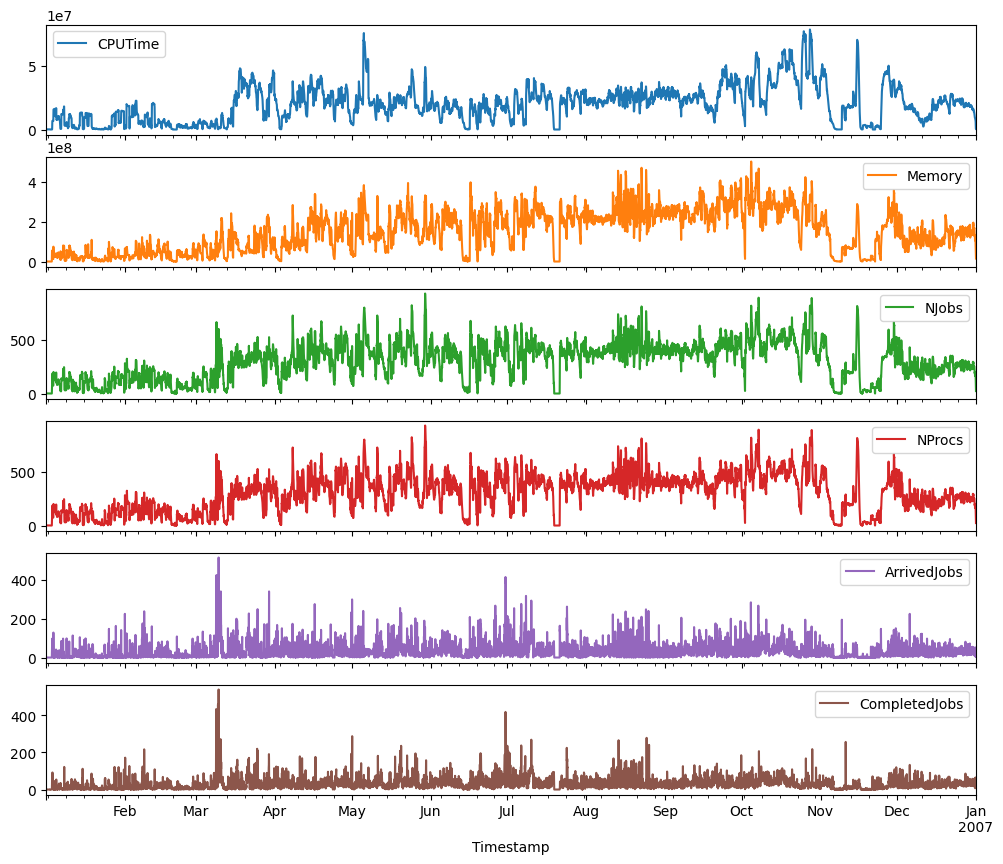

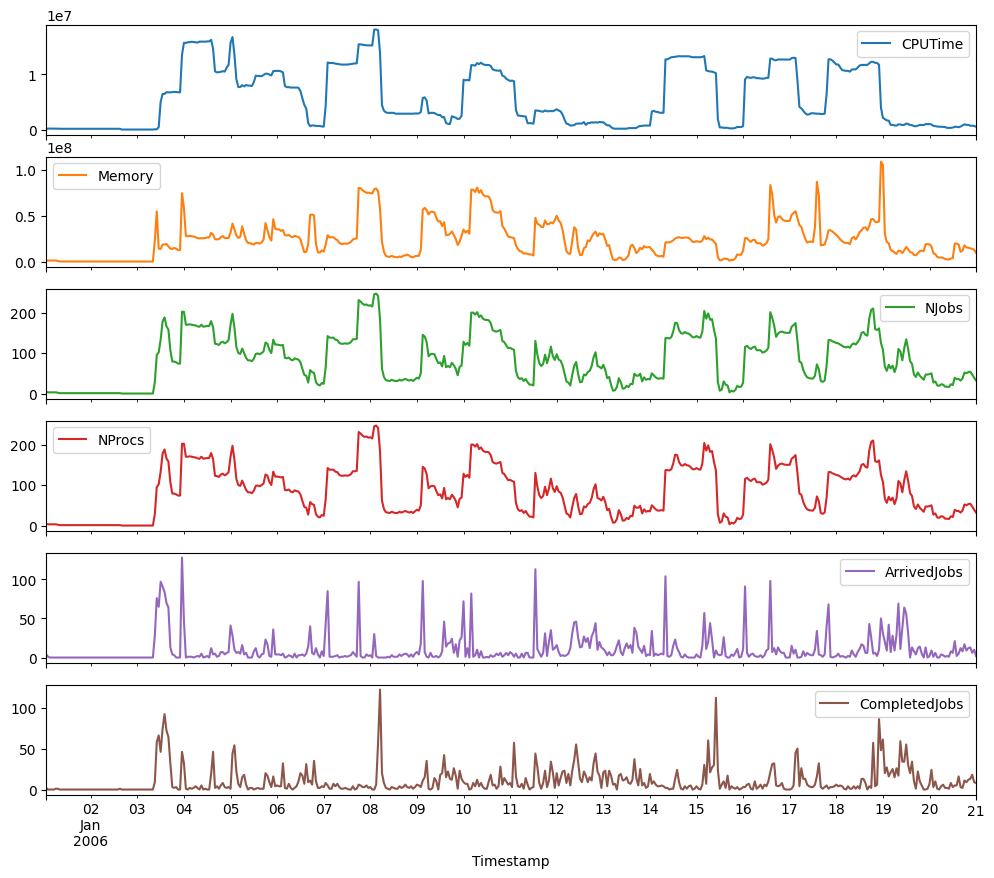

In [6]:
plot_cols = ['CPUTime', 'Memory', 'NJobs', 'NProcs', 'ArrivedJobs', 'CompletedJobs']
plot_features = dataset[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = dataset[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [7]:
column_indices = {name: i for i, name in enumerate(dataset.columns)}

n = len(dataset)
train_df = dataset[int(n*0):int(n*0.8)]
test_df = dataset[int(n*0.8):int(n*1.0)]

num_features = dataset.shape[1]

In [8]:
train_df.head()

,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs,cosHour,sinHour,cosDay,sinDay
0,157109,705984,4,4,4,2,0.965926,0.258819,0.999852,0.017213
1,175300,1101404,3,3,1,0,0.866025,0.500000,0.999852,0.017213
2,175300,1101404,3,3,0,0,0.707107,0.707107,0.999852,0.017213
3,175300,1101404,3,3,0,0,0.500000,0.866025,0.999852,0.017213
4,175300,1101404,3,3,0,0,0.258819,0.965926,0.999852,0.017213


In [9]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CPUTime,7008.0,1.961011e+07,1.293042e+07,0.000000,9.380714e+06,2.012375e+07,2.728363e+07,7.573649e+07
Memory,7008.0,1.568897e+08,1.057299e+08,0.000000,5.414695e+07,1.667062e+08,2.384062e+08,5.014689e+08
NJobs,7008.0,3.136203e+02,1.720531e+02,0.000000,1.650000e+02,3.480000e+02,4.330000e+02,9.370000e+02
NProcs,7008.0,3.136203e+02,1.720531e+02,0.000000,1.650000e+02,3.480000e+02,4.330000e+02,9.370000e+02
ArrivedJobs,7008.0,3.276869e+01,4.068124e+01,0.000000,7.000000e+00,2.000000e+01,4.400000e+01,5.130000e+02
CompletedJobs,7008.0,3.268550e+01,3.534041e+01,0.000000,1.100000e+01,2.400000e+01,4.300000e+01,5.400000e+02
cosHour,7008.0,-5.348335e-17,7.071572e-01,-1.000000,-7.071068e-01,-6.123234e-17,7.071068e-01,1.000000e+00
sinHour,7008.0,-1.267378e-17,7.071572e-01,-1.000000,-7.071068e-01,6.123234e-17,7.071068e-01,1.000000e+00
cosDay,7008.0,-1.904814e-01,6.579294e-01,-0.999963,-8.090170e-01,-3.090055e-01,3.090170e-01,9.998518e-01
sinDay,7008.0,1.356974e-01,7.159378e-01,-0.999991,-6.016241e-01,3.090141e-01,8.077447e-01,9.999907e-01


In [10]:
train_mean = train_df.mean()
train_std = train_df.std()

def scale(data, column):
    return (data - train_mean[column]) / train_std[column]

def descale(data, column):
    return (data * train_std[column]) + train_mean[column]

# train_df = scale(train_df, train_df.columns)

In [11]:
train_df.head()

,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs,cosHour,sinHour,cosDay,sinDay
0,157109,705984,4,4,4,2,0.965926,0.258819,0.999852,0.017213
1,175300,1101404,3,3,1,0,0.866025,0.500000,0.999852,0.017213
2,175300,1101404,3,3,0,0,0.707107,0.707107,0.999852,0.017213
3,175300,1101404,3,3,0,0,0.500000,0.866025,0.999852,0.017213
4,175300,1101404,3,3,0,0,0.258819,0.965926,0.999852,0.017213


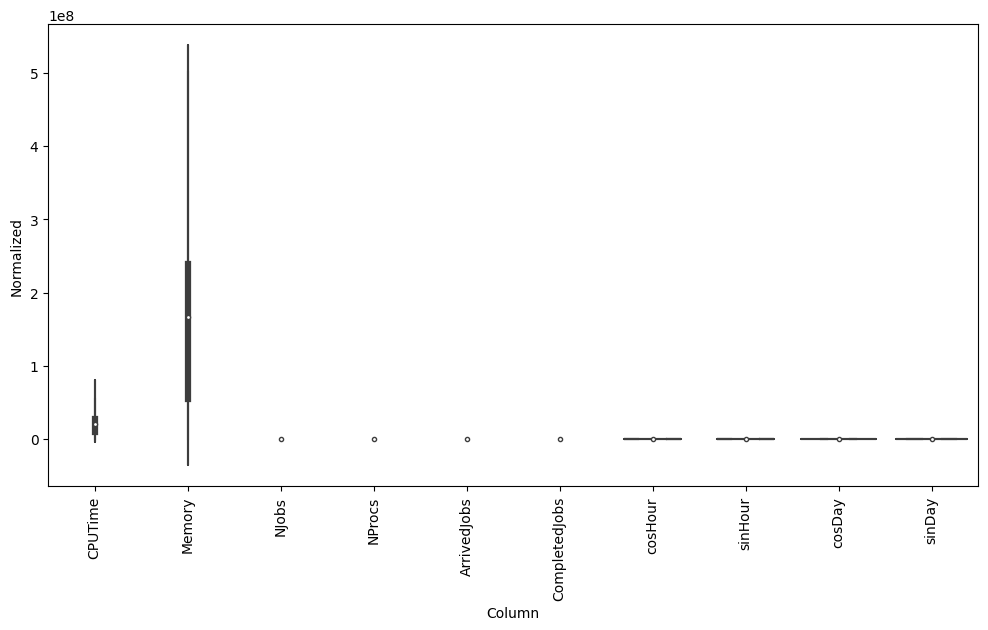

In [12]:
df_std = train_df.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(dataset.keys(), rotation=90)

## Data windowing

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data. 

The main features of the input windows are:

- The width (number of time steps) of the input and label windows.
- The time offset between them.
- Which features are used as inputs, labels, or both. 


### 1. Indexes and offsets

Start by creating the `WindowGenerator` class. The `__init__` method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to `tf.data.Dataset`s of windows later.

In [13]:
import numpy as np

class WindowGenerator():
    def __init__(self, input_width, label_width, shift, label_columns, train_df = train_df, test_df = test_df):
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        self.total_window_size = input_width + shift
        self.label_columns = label_columns

        self.train_df = train_df
        self.test_df = test_df

        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}


In [14]:
def split_window(self, features):
    inputs = features[:, :self.input_width]
    labels = features[:, self.input_width:]
    if self.label_columns is not None:
        labels = labels[:, [self.label_columns_indices[label] for label in self.label_columns]]
    return inputs, labels

WindowGenerator.split_window = split_window

In [15]:
def make_dataset(self, data):
    features = np.array(data, dtype=np.float32)
    labels = np.array(data.iloc[:, [self.column_indices[column] for column in self.label_columns]], dtype=np.float32)
    ds_features = []
    ds_labels = []
    for i in range(len(data) - self.total_window_size + 1):
        ds_features.append(features[i:i+self.input_width][0])
        ds_labels.append(labels[i+self.input_width:i+self.total_window_size][0])
    ds_features = np.array(ds_features)
    ds_labels = np.array(ds_labels)

    return ds_features, ds_labels

WindowGenerator.make_dataset = make_dataset

In [16]:
@property
def train(self):
    inputs, labels = self.make_dataset(self.train_df)
    return inputs, labels

@property
def test(self):
    inputs, labels = self.make_dataset(self.test_df)
    return inputs, labels

@property
def example(self):
    return self.train  # Return the training dataset for plotting

WindowGenerator.train = train
WindowGenerator.test = test
WindowGenerator.example = example


In [17]:
me_performance = {}
mae_performance = {}

In [18]:
labels = 'CPUTime'

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=[labels])


x_train, y_train = window.train
x_test, y_test = window.test

# Create and fit the regression model
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

# Make predictions using the regression model
y_pred = regression_model.predict(x_test)

# y_pred = descale(y_pred, labels)
# y_test = descale(y_test, labels)

me = np.sum(y_test - y_pred) / (len(y_test)*np.mean(y_test))
normalised_me = me / np.mean(y_test)

mae = mean_absolute_error(y_test, y_pred)
normalised_MAE = mae / np.mean(y_test)

me_performance["Linear Regression"] = normalised_me*100
mae_performance["Linear Regression"] = normalised_MAE*100

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=[labels])

x_train, y_train = window.train
x_test, y_test = window.test

try:
    print("Loading Lasso Grid...")
    lasso_grid = joblib.load( 'pkl/lasso_grid.pkl')
except:
    print("Lasso Grid not found. Creating...")
    lasso = Lasso()
    lasso_params = {'alpha': [5000000, 7500000, 1000000, 1500000], 'max_iter': [10000000]} 
    lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
    lasso_grid.fit(x_train, y_train)

try:
    print("Loading Ridge Grid...")
    ridge_grid = joblib.load( 'pkl/ridge_grid.pkl')
except:
    print("Ridge Grid not found. Creating...")
    ridge = Ridge()
    ridge_params = {'alpha': [1e-17, 1e-10, 1e-8, 1e-9, 1e-11, 1e-12], 'max_iter': [10000000]}
    ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
    ridge_grid.fit(x_train, y_train)
# Tune for models using GridSearchCV

try:
    print("Loading Elastic Grid...")
    elastic_grid = joblib.load('pkl/elastic_grid.pkl')
except:
    print("Elastic Grid not found. Creating...")
    elastic = ElasticNet()
    elastic_params = {'alpha': [75, 100, 125, 150, 175, 200, 225, 250], 'max_iter': [10000000]}
    elastic_grid = GridSearchCV(elastic, elastic_params, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
    elastic_grid.fit(x_train, y_train)

joblib.dump(lasso_grid, 'pkl/lasso_grid.pkl')
joblib.dump(ridge_grid, 'pkl/ridge_grid.pkl')
joblib.dump(elastic_grid, 'pkl/elastic_grid.pkl')

# Make predictions using the tuned models
y_pred_lasso = lasso_grid.predict(x_test)
y_pred_ridge = ridge_grid.predict(x_test)
y_pred_elastic = elastic_grid.predict(x_test)

me_lasso = np.sum(y_test - y_pred_lasso) / (len(y_test)*np.mean(y_test))
me_ridge = np.sum(y_test - y_pred_ridge) / (len(y_test)*np.mean(y_test))
me_elastic = np.sum(y_test - y_pred_elastic) / (len(y_test)*np.mean(y_test))

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)

normalised_ME_lasso = me_lasso / np.mean(y_test)
normalised_ME_ridge = me_ridge / np.mean(y_test)
normalised_ME_elastic = me_elastic / np.mean(y_test)

normalised_MAE_lasso = mae_lasso / np.mean(y_test)
normalised_MAE_ridge = mae_ridge / np.mean(y_test)
normalised_MAE_elastic = mae_elastic / np.mean(y_test)

me_performance["Lasso"] = normalised_ME_lasso*100
me_performance["Ridge"] = normalised_ME_ridge*100
me_performance["Elastic Net"] = normalised_ME_elastic*100

mae_performance["Lasso"] = normalised_MAE_lasso*100
mae_performance["Ridge"] = normalised_MAE_ridge*100
mae_performance["Elastic Net"] = normalised_MAE_elastic*100

mae_performance


Loading Lasso Grid...
Loading Ridge Grid...
Loading Elastic Grid...


{'Lasso': 2.8879720717668533,
 'Ridge': 2.9558544978499413,
 'Elastic Net': 2.893582545220852,
 'Polynomial Regression': 23.350515961647034}

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=[labels])

x_train, y_train = window.train
x_test, y_test = window.test

try:
    print("Loading Polynomial Grid...")
    poly_grid = joblib.load('pkl/poly_grid.pkl')
except:
    poly = PolynomialFeatures()
    linear = LinearRegression()
    pipe = Pipeline([('poly', poly), ('linear', linear)])
    params = {'poly__degree': [2, 3, 4]}
    poly_grid = GridSearchCV(pipe, params, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
    poly_grid.fit(x_train, y_train)

joblib.dump(poly_grid, 'pkl/poly_grid.pkl')

y_pred_poly = poly_grid.predict(x_test)

me_poly = np.sum(y_test - y_pred_poly) / (len(y_test)*np.mean(y_test))
mae_poly = mean_absolute_error(y_test, y_pred_poly)

normalised_ME_poly = me_poly / np.mean(y_test)
normalised_MAE_poly = mae_poly / np.mean(y_test)

me_performance["Polynomial Regression"] = normalised_ME_poly*100
mae_performance["Polynomial Regression"] = normalised_MAE_poly*100

mae_performance 


Loading Polynomial Grid...


{'Lasso': 2.8879720717668533,
 'Ridge': 2.9558544978499413,
 'Elastic Net': 2.893582545220852,
 'Polynomial Regression': 23.350515961647034,
 'Linear Regression': 2.889242395758629}

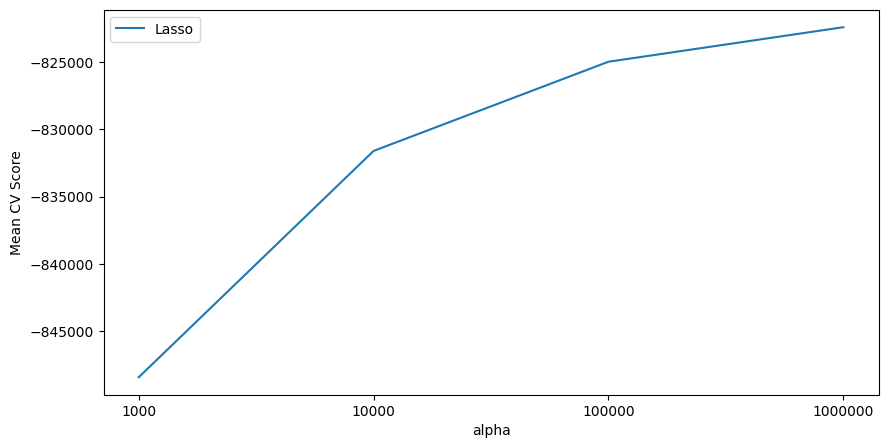

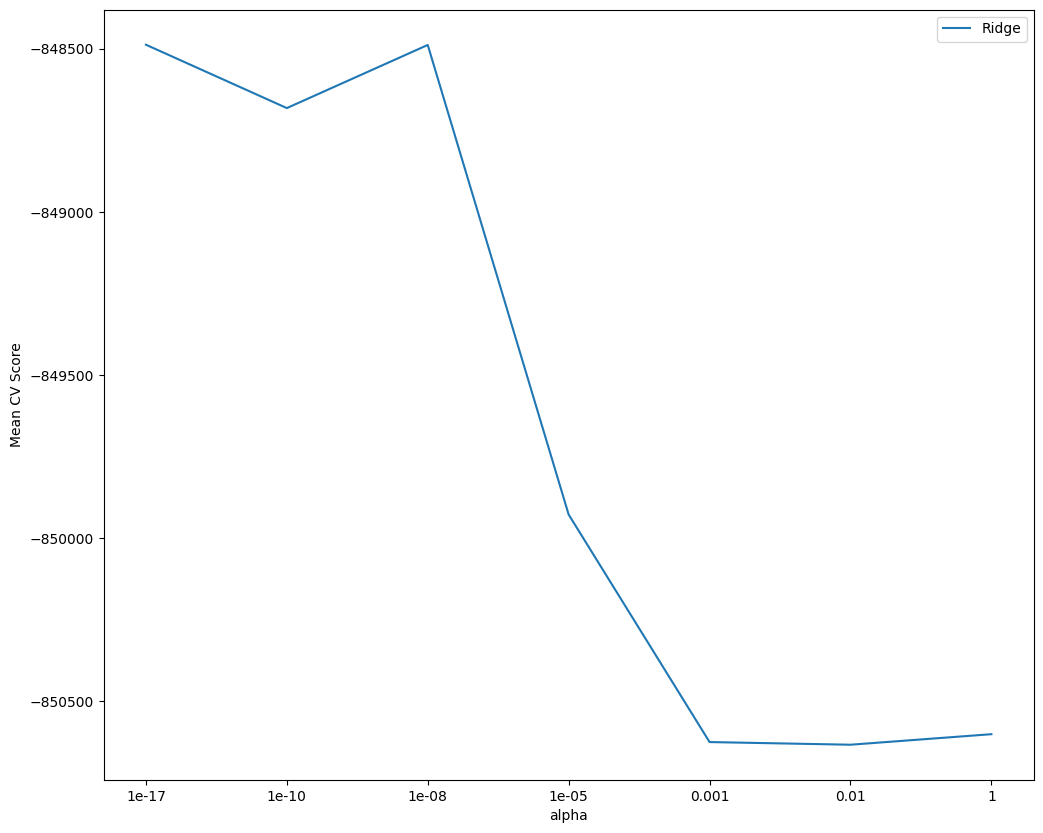

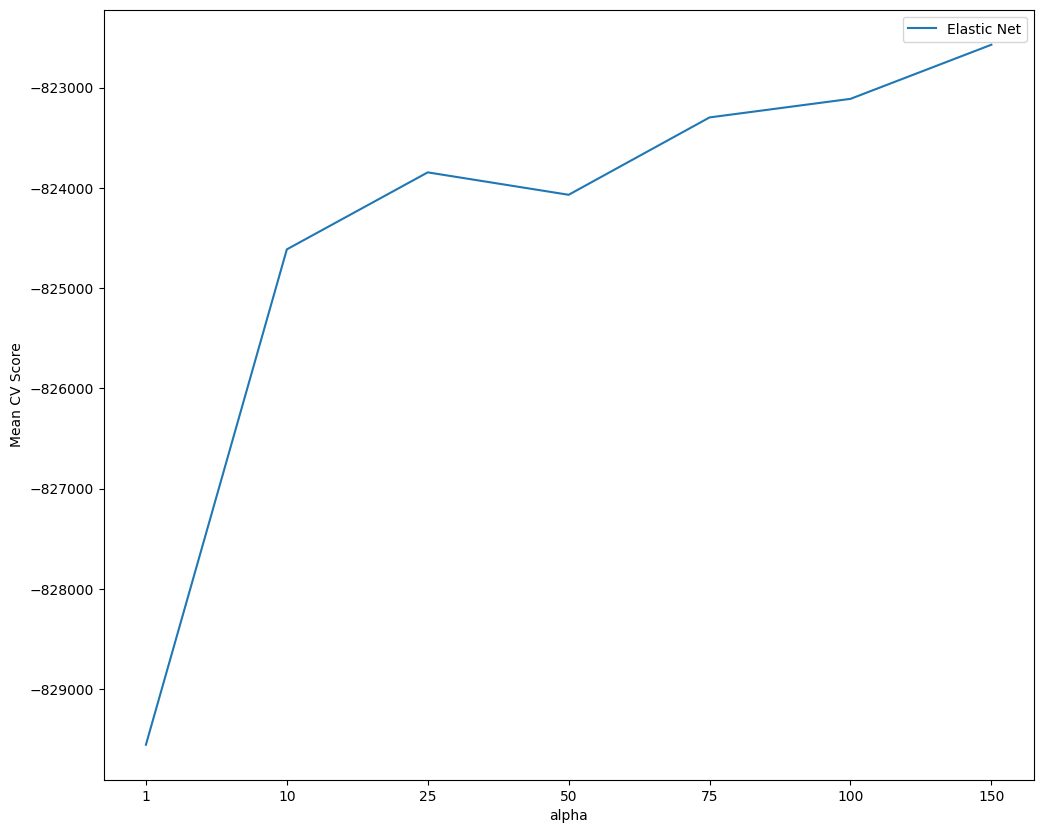

In [30]:
#plot grid search result MAE

lasso_alpha = [str(i) for i in lasso_grid.cv_results_['param_alpha']]
ridge_alpha = [str(i) for i in ridge_grid.cv_results_['param_alpha']]
elastic_alpha = [str(i) for i in elastic_grid.cv_results_['param_alpha']]

plt.figure(figsize=(10, 5))
plt.plot(lasso_alpha, lasso_grid.cv_results_['mean_test_score'], label='Lasso')
plt.xlabel('alpha')
plt.ylabel('Mean CV Score')
plt.legend()
plt.show()

plt.plot(ridge_alpha, ridge_grid.cv_results_['mean_test_score'], label='Ridge')
plt.xlabel('alpha')
plt.ylabel('Mean CV Score')
plt.legend()
plt.show()

plt.plot(elastic_alpha, elastic_grid.cv_results_['mean_test_score'], label='Elastic Net')
plt.xlabel('alpha')
plt.ylabel('Mean CV Score')
plt.legend()
plt.show()



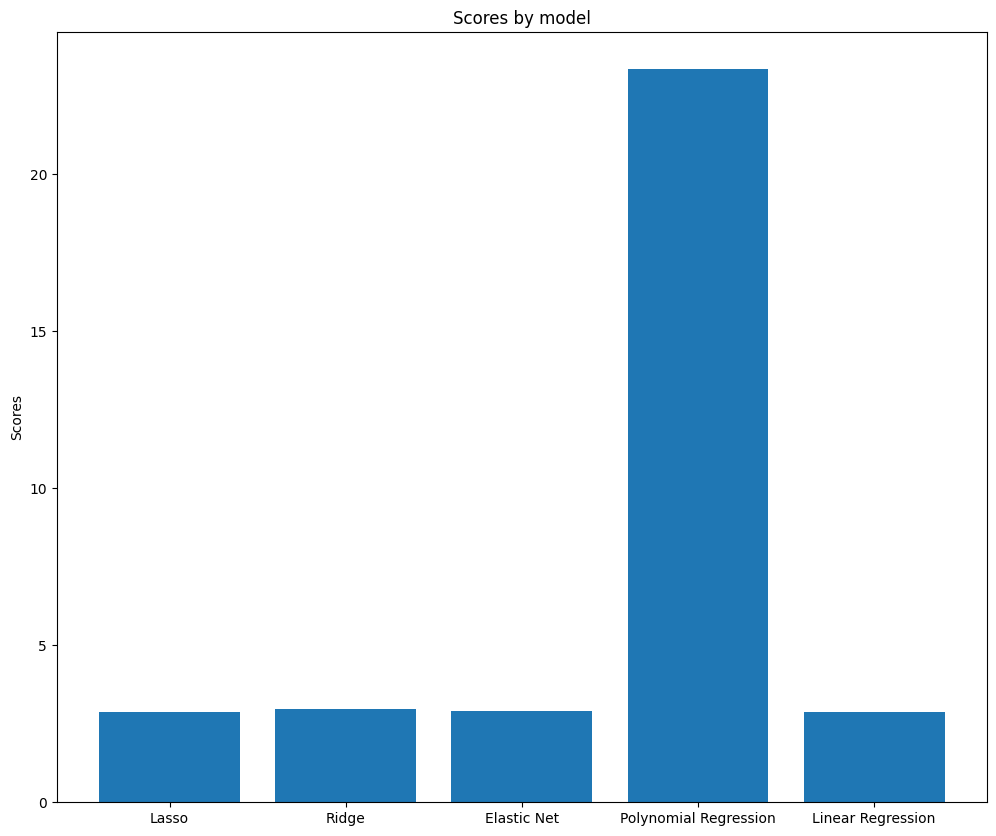

In [36]:
x = np.arange(len(me_performance))
fig, ax = plt.subplots()
rects1 = ax.bar(x, mae_performance.values(), label='MAE')
ax.set_ylabel('Scores')
ax.set_title('Scores by model')
ax.set_xticks(x, list(me_performance.keys()))
plt.show()

In [37]:
me_performance

{'Lasso': -7.02583083768079e-06,
 'Ridge': -6.592070704681725e-09,
 'Elastic Net': -1.0159379813447556e-05,
 'Polynomial Regression': -6.036963668905793e-09,
 'Linear Regression': -5.432436766491362e-09}

<BarContainer object of 10 artists>

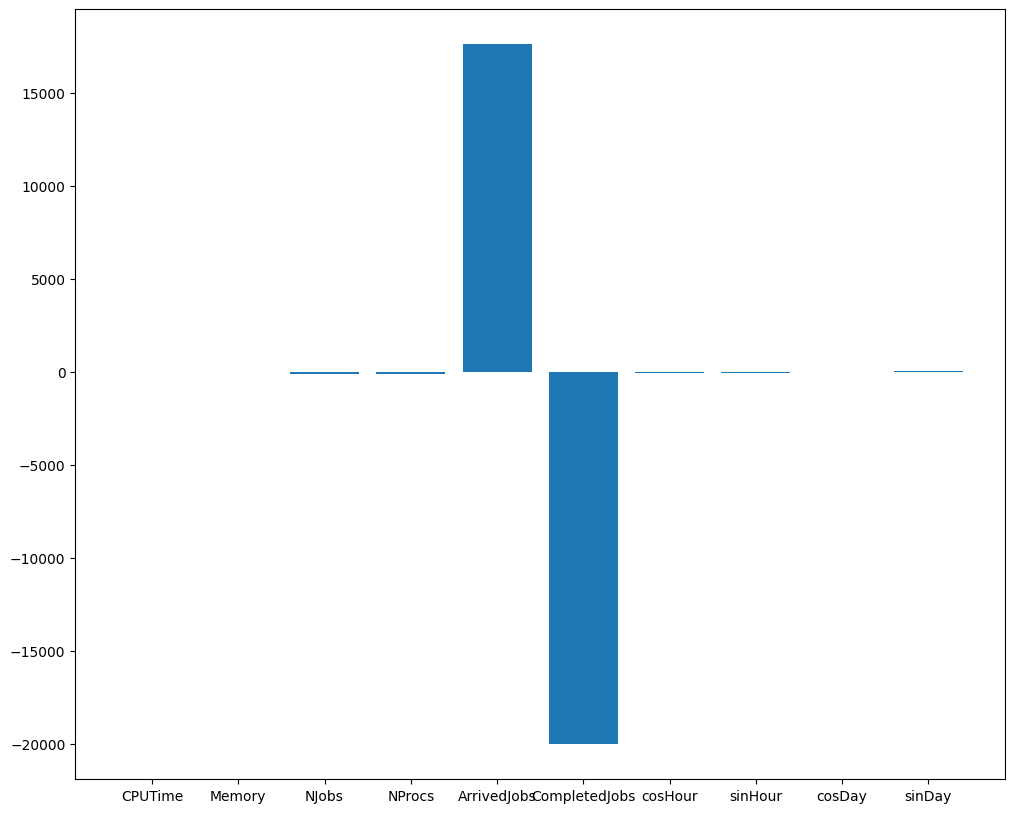

In [39]:
plt.bar(train_df.columns, regression_model.coef_[0])

In [40]:
test_ds = pd.read_csv("./datasets/final/final-formed-sharcnet.csv", delimiter=',', date_parser=dateParser, parse_dates=['Timestamp'])
test_ds["cosHour"] = test_ds["Timestamp"].map(lambda timestamp: np.cos(2*np.pi*timestamp.hour/24))
test_ds["sinHour"] = test_ds["Timestamp"].map(lambda timestamp: np.sin(2*np.pi*timestamp.hour/24))

test_ds["cosDay"] = test_ds["Timestamp"].map(lambda timestamp: np.cos(2*np.pi*timestamp.timetuple().tm_yday/365))
test_ds["sinDay"] = test_ds["Timestamp"].map(lambda timestamp: np.sin(2*np.pi*timestamp.timetuple().tm_yday/365))

test_ds.drop(columns=["Timestamp"], inplace=True)
# dataset.drop(columns=["ArrivedJobs", "CompletedJobs", 'NJobs'], inplace=True)

test_window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=[labels], train_df=test_ds, test_df=test_ds)

x_test_ds, y_test_ds = test_window.test

# Make out-of-sample predictions
oos_pred = lasso_grid.predict(x_test_ds)

#truncate negative values
oos_pred = oos_pred.clip(min=0)

me = np.sum(y_test_ds - oos_pred) / (len(y_test_ds)*np.mean(y_test_ds))
print("ME (%): ", me*100)

mae = mean_absolute_error(y_test_ds, oos_pred)
print("MAE : ", mae)

normalised_MAE = mae / np.mean(y_test_ds)
print("MAPE (%): ", normalised_MAE*100)

r2 = r2_score(y_test_ds, oos_pred)
print("R2: ", r2)



/var/folders/rz/x38ry1m901jcjct47ydtrgph0000gn/T/ipykernel_68089/1268601050.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  test_ds = pd.read_csv("./datasets/final/final-formed-sharcnet.csv", delimiter=',', date_parser=dateParser, parse_dates=['Timestamp'])


ME (%):  7552.382870246069
MAE :  7512846.5
MAPE (%):  2.222547307610512
R2:  0.989033129757065


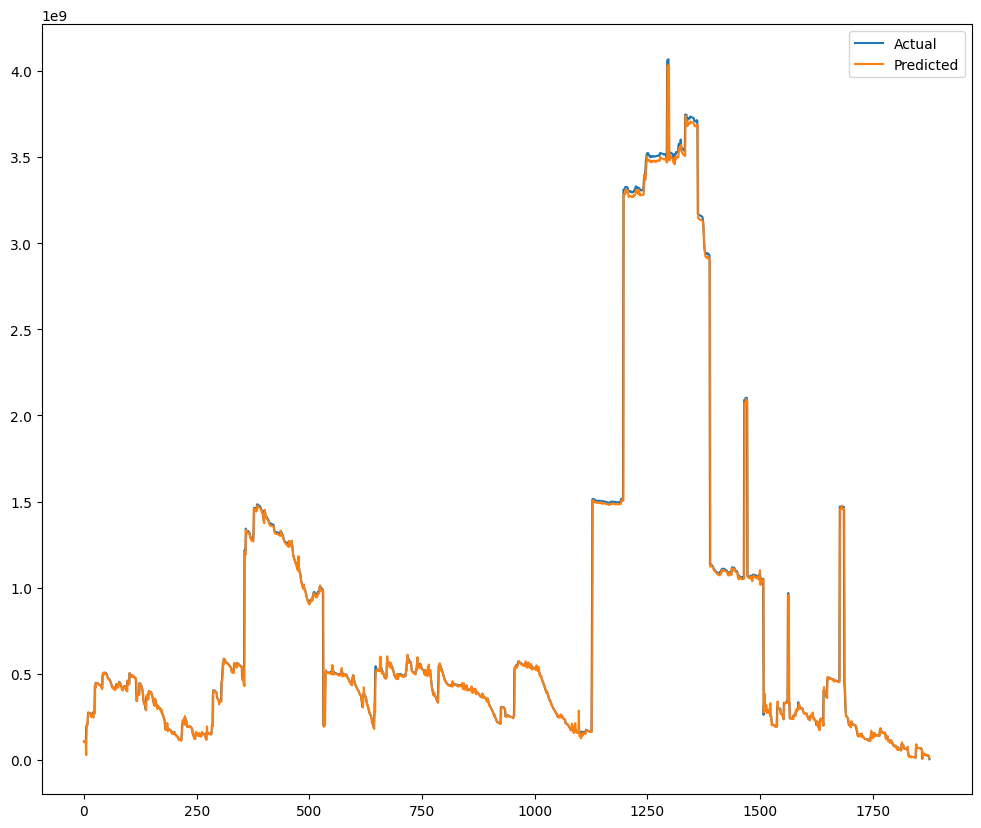

In [41]:
plt.plot(y_test_ds[int(len(y_test_ds)*0.8):], label="Actual")
plt.plot(oos_pred[int(len(y_test_ds)*0.8):], label="Predicted")
plt.legend()
plt.show()

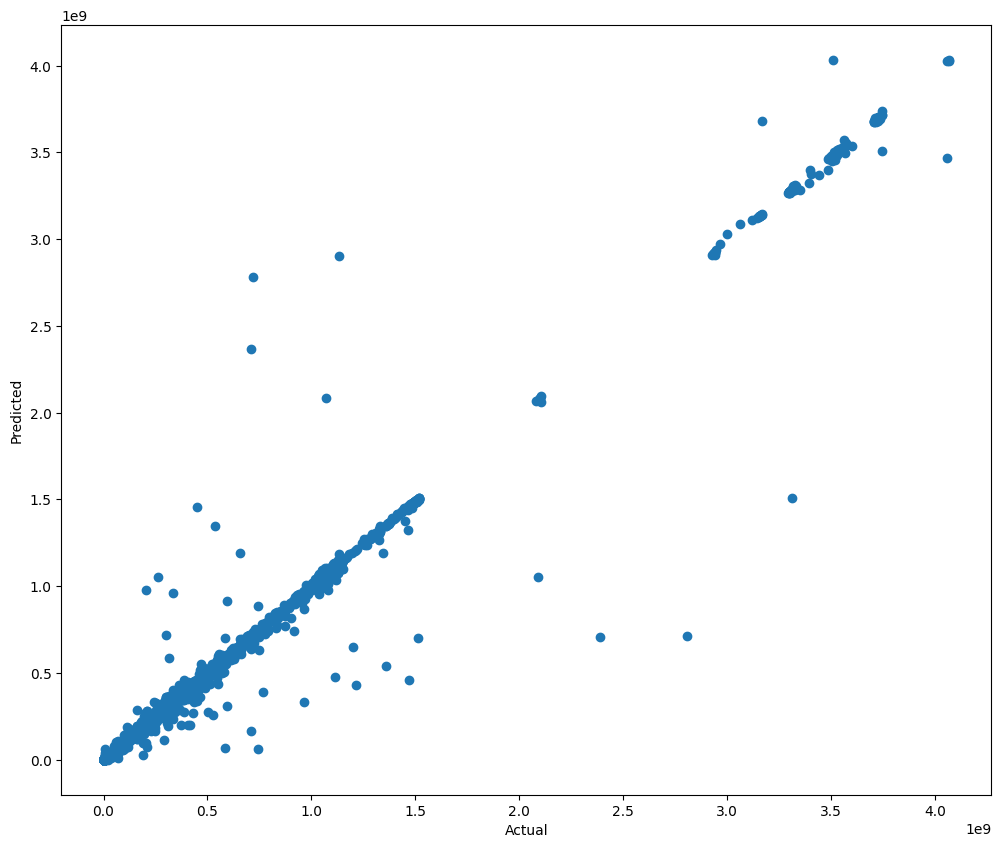

In [42]:
plt.plot(y_test_ds, oos_pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

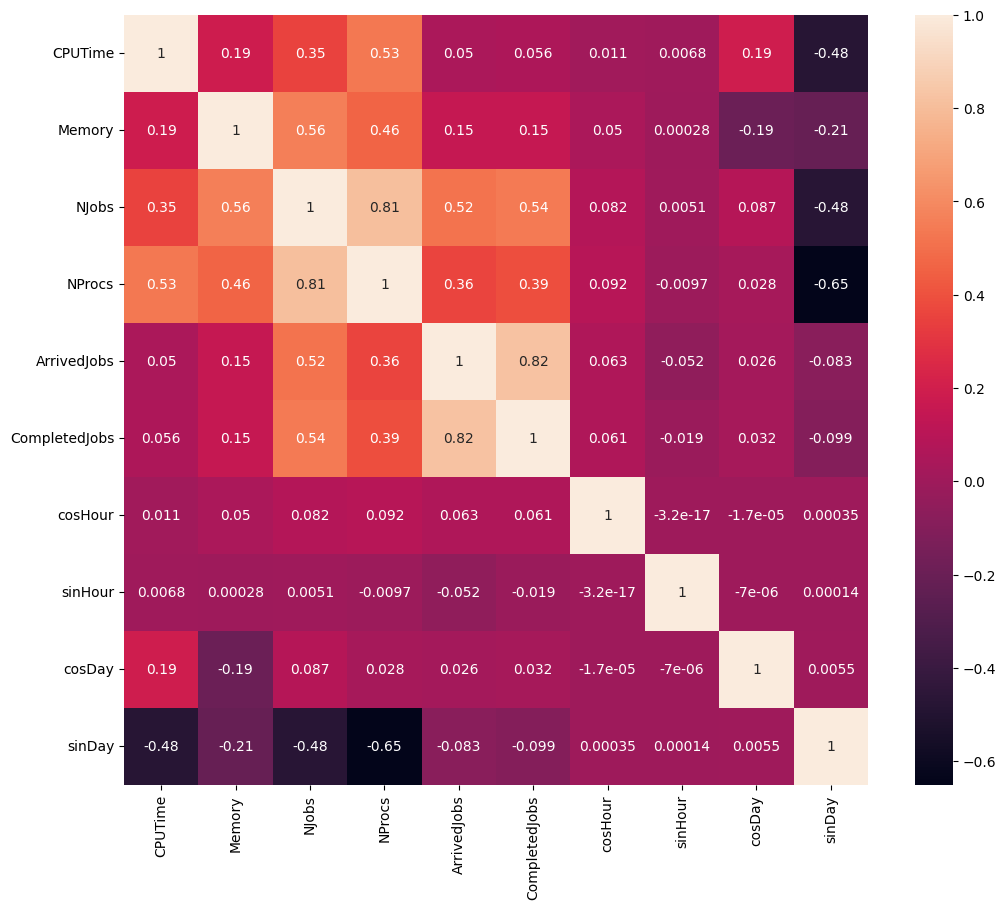

In [ ]:
#correlation matrix for dataset
corrMatrix = test_ds.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
